Libraries successfully imported!
Global Renewable Energy Dataset 2025:
        Date Country Energy_Source  Production_MWh  Investment_Million_USD  \
0 2025-01-01     USA         Solar      191.460066              209.227096   
1 2025-01-01     USA          Wind      240.231882              249.948301   
2 2025-01-01     USA         Hydro      344.461353              317.488960   
3 2025-01-01     USA    Geothermal       92.101051               84.443572   
4 2025-01-01     USA       Biomass      137.862900              143.793478   

   Capacity_MW  Efficiency_Percent  Carbon_Offset_Tons  Year  Month  Quarter  \
0   264.137837            0.739005          101.703377  2025      1        1   
1   339.308740            0.705146          166.716595  2025      1        1   
2   467.581117            0.807986          192.294113  2025      1        1   
3   120.643954            0.814017           60.513631  2025      1        1   
4   172.488165            0.716263           95.094672  2025

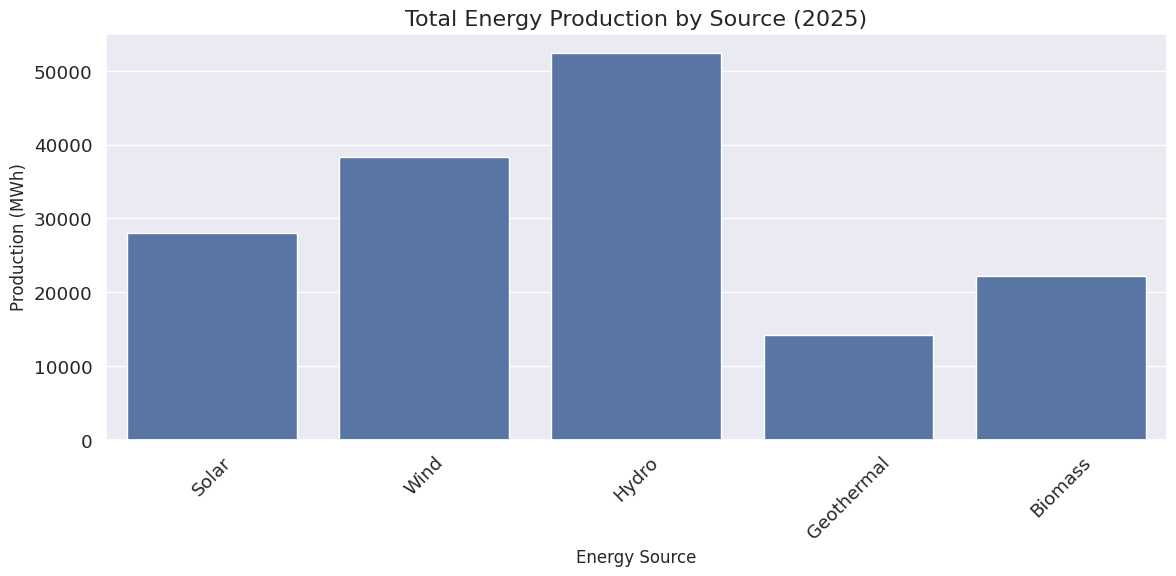

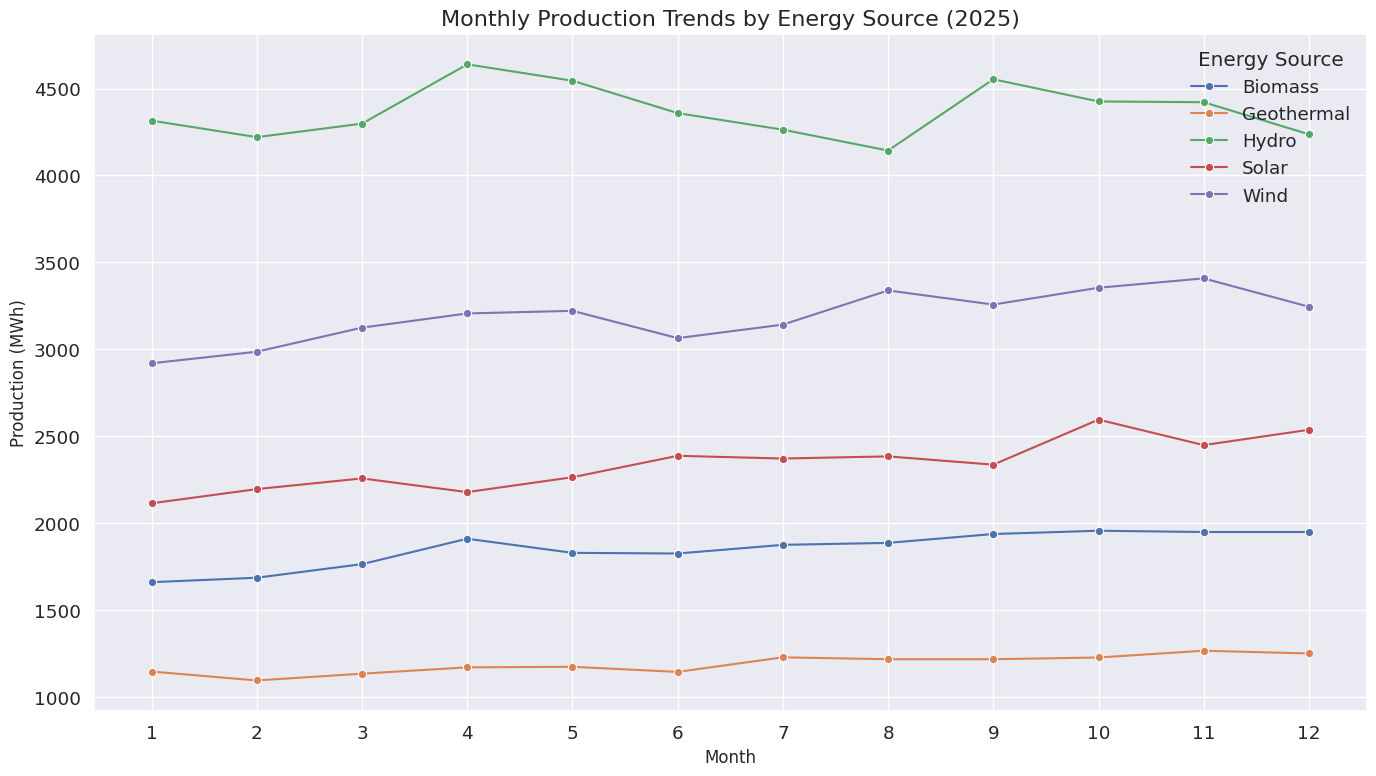

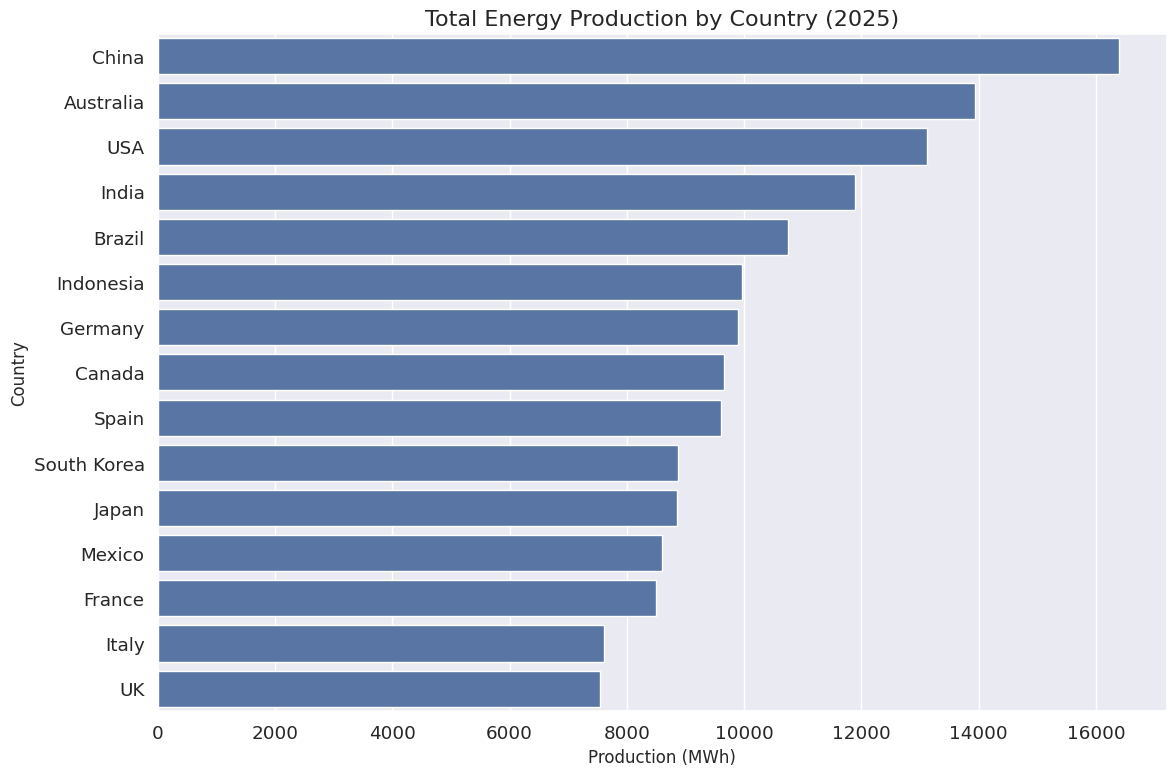

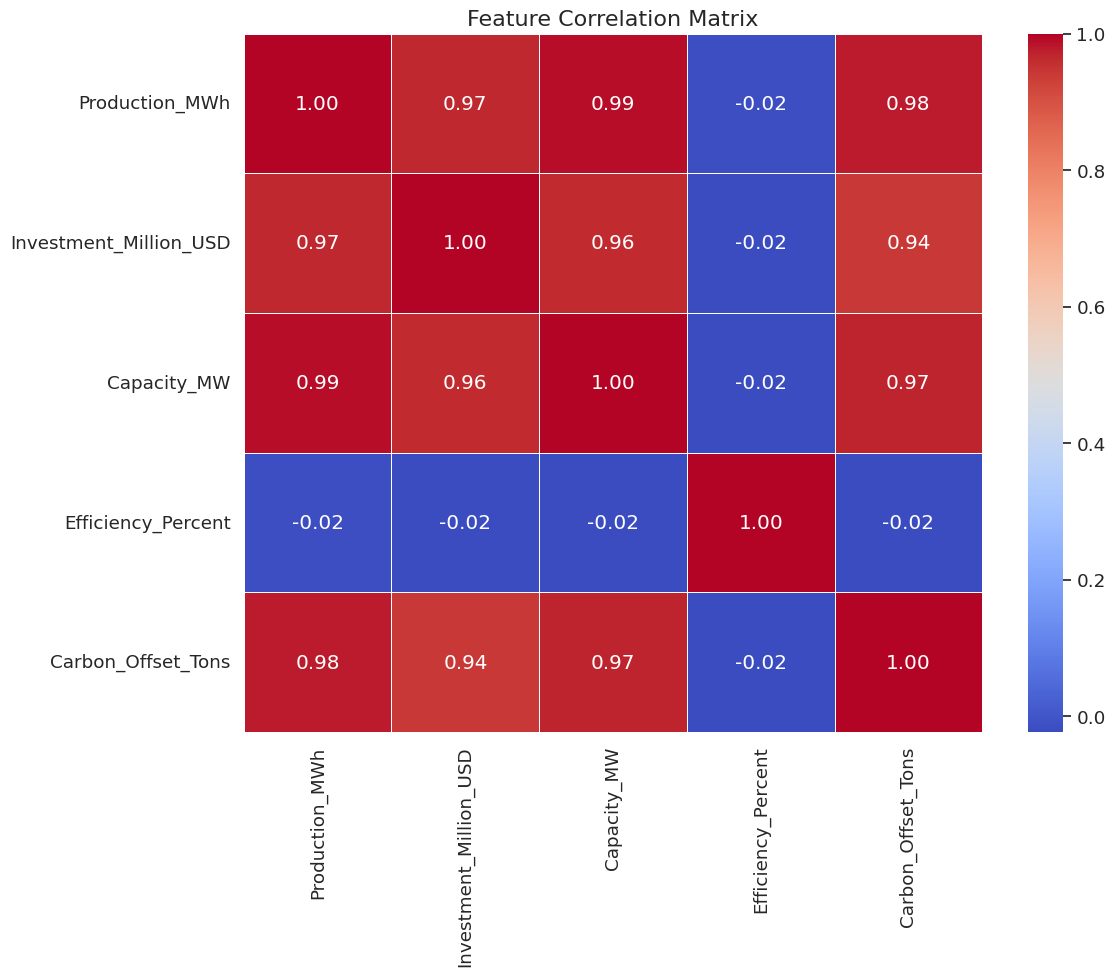

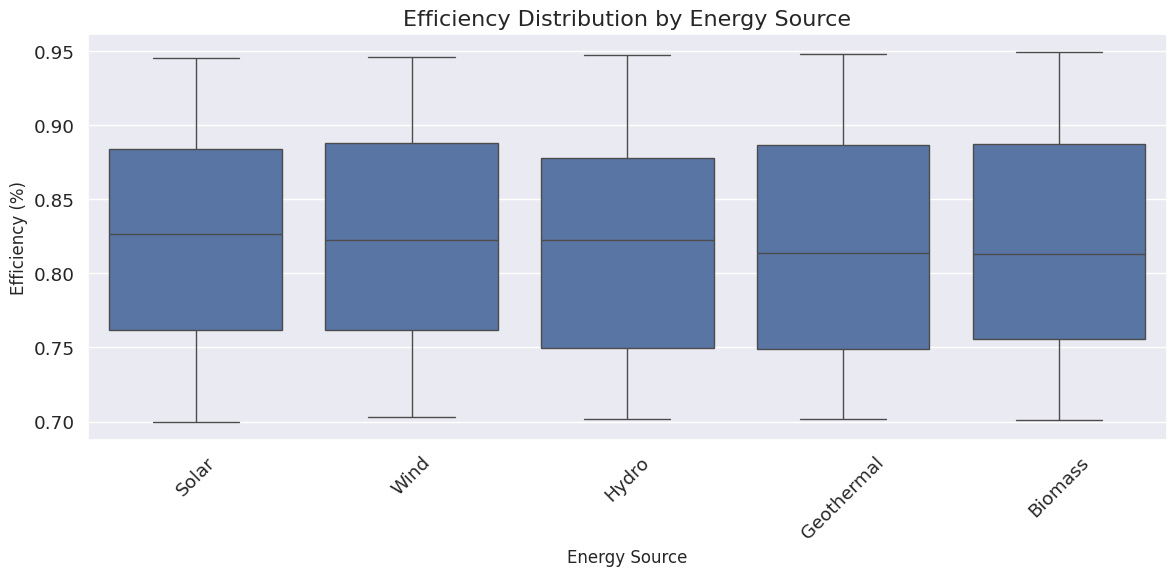


Dataset after Feature Engineering:
        Date  Production_MWh  Investment_Million_USD  Capacity_MW  \
0 2025-01-01      191.460066              209.227096   264.137837   
1 2025-01-01      240.231882              249.948301   339.308740   
2 2025-01-01      344.461353              317.488960   467.581117   
3 2025-01-01       92.101051               84.443572   120.643954   
4 2025-01-01      137.862900              143.793478   172.488165   

   Efficiency_Percent  Carbon_Offset_Tons  Year  Month  Quarter  \
0            0.739005          101.703377  2025      1        1   
1            0.705146          166.716595  2025      1        1   
2            0.807986          192.294113  2025      1        1   
3            0.814017           60.513631  2025      1        1   
4            0.716263           95.094672  2025      1        1   

   Weather_Impact_Low  ...  Country_Mexico  Country_South Korea  \
0               False  ...           False                False   
1           

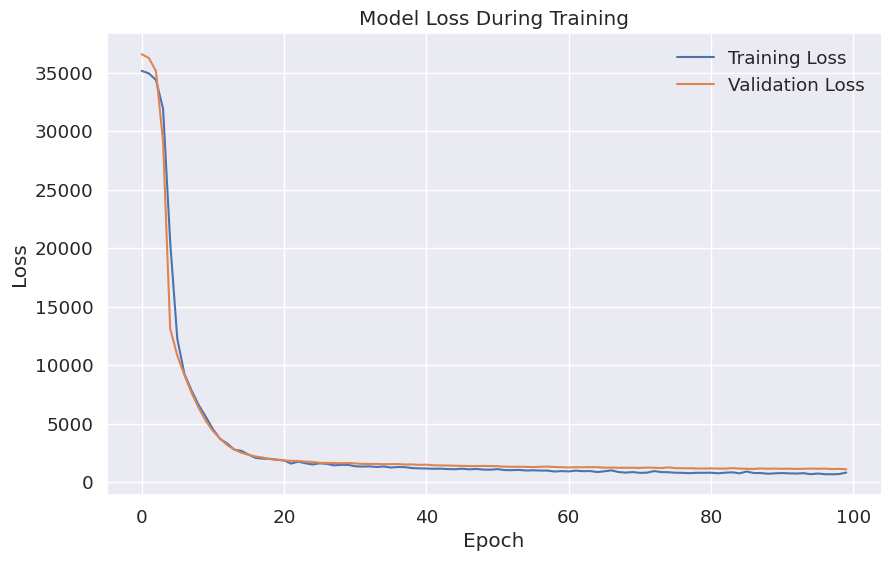

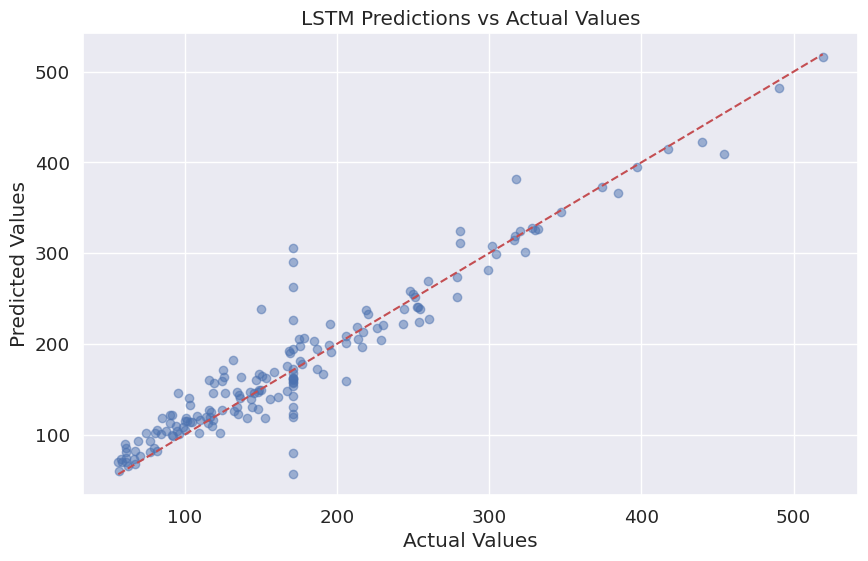


Feature Importance from XGBoost Model:


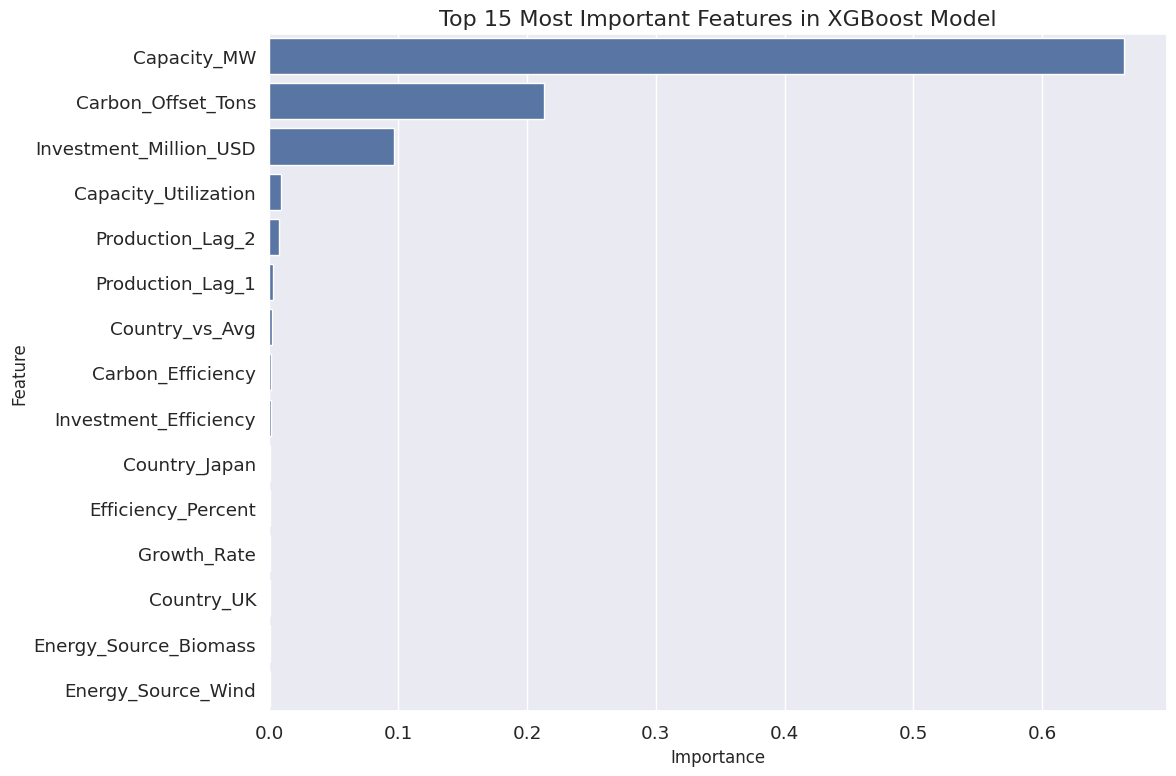


Calculating SHAP Values for model interpretation...


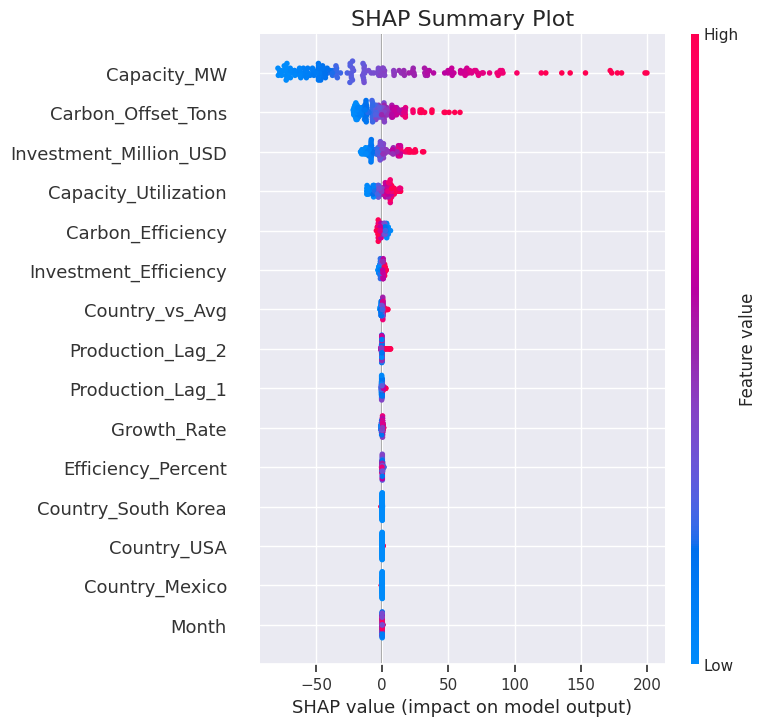

<Figure size 1000x600 with 0 Axes>

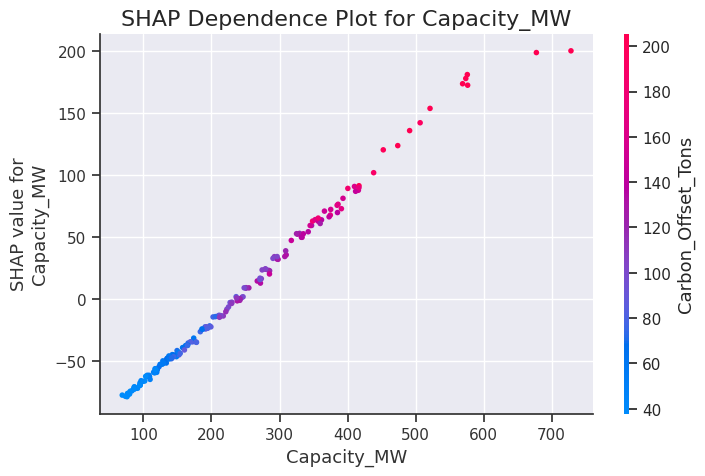


CONCLUSIONS AND RECOMMENDATIONS

1. Model Performance:
   - Best model: XGBoost with R² = 0.9955
   - RMSE: 6.41 MWh
   - MAE: 3.04 MWh

2. Key Findings:
   - Most influential feature: Capacity_MW
   - Energy source with highest production: Hydro
   - Country with highest renewable energy production: China

3. Recommendations:
   - Focus investments on energy sources with high efficiency
   - Increase production capacity in countries with high potential but low utilization
   - Develop policies supporting renewable energy growth
   - Consider weather factors in energy production planning

4. Future Work:
   - Integrate real-time data for more accurate predictions
   - Develop more complex ensemble models
   - Analyze economic and social impacts of energy transition
   - Model scenarios for carbon neutrality targets

Portfolio project completed!


In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow xgboost shap -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
%matplotlib inline

print("Libraries successfully imported!")

# Part 1: Data Loading and Preprocessing
# ======================================

# Simulate global renewable energy dataset for 2025
np.random.seed(42)

countries = ['USA', 'China', 'Germany', 'Japan', 'India', 'Brazil', 'Australia',
             'UK', 'France', 'Canada', 'South Korea', 'Italy', 'Spain', 'Mexico', 'Indonesia']

energy_sources = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']

# Generate data
data = []
for country in countries:
    for month in range(1, 13):
        for source in energy_sources:
            # Base production values with growth trends
            base_value = {
                'Solar': 150 + month * 2,
                'Wind': 200 + month * 3,
                'Hydro': 300 + month * 1,
                'Geothermal': 80 + month * 0.5,
                'Biomass': 120 + month * 1.5
            }[source]

            # Country-specific factors
            country_factor = {
                'USA': 1.2, 'China': 1.5, 'Germany': 0.9, 'Japan': 0.8,
                'India': 1.1, 'Brazil': 1.0, 'Australia': 1.3, 'UK': 0.7,
                'France': 0.8, 'Canada': 0.9, 'South Korea': 0.8,
                'Italy': 0.7, 'Spain': 0.9, 'Mexico': 0.8, 'Indonesia': 0.9
            }[country]

            # Random variations
            variation = np.random.normal(1, 0.1)

            # Calculate production
            production = base_value * country_factor * variation

            # Other features
            investment = production * (0.8 + np.random.random() * 0.4)
            capacity = production * (1.2 + np.random.random() * 0.3)
            efficiency = 0.7 + np.random.random() * 0.25
            carbon_offset = production * (0.5 + np.random.random() * 0.2)

            # Weather impact (simulated)
            weather_impact = np.random.choice(['High', 'Medium', 'Low'], p=[0.2, 0.5, 0.3])

            # Policy support (simulated)
            policy_support = np.random.choice(['Strong', 'Moderate', 'Weak'], p=[0.4, 0.4, 0.2])

            data.append([
                f"2025-{month:02d}-01", country, source,
                production, investment, capacity, efficiency,
                carbon_offset, weather_impact, policy_support
            ])

# Create DataFrame
columns = ['Date', 'Country', 'Energy_Source', 'Production_MWh',
           'Investment_Million_USD', 'Capacity_MW', 'Efficiency_Percent',
           'Carbon_Offset_Tons', 'Weather_Impact', 'Policy_Support']

df = pd.DataFrame(data, columns=columns)

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Impact', 'Policy_Support'], drop_first=True)

# Display the first few rows
print("Global Renewable Energy Dataset 2025:")
print(df.head())
print(f"\nDataset size: {df.shape}")

# Part 2: Exploratory Data Analysis (EDA)
# =======================================

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Visualization of production by energy source
plt.figure(figsize=(12, 6))
sns.barplot(x='Energy_Source', y='Production_MWh', data=df, estimator=sum, ci=None)
plt.title('Total Energy Production by Source (2025)', fontsize=16)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Production (MWh)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization of monthly production trends
monthly_production = df.groupby(['Month', 'Energy_Source'])['Production_MWh'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Production_MWh', hue='Energy_Source', data=monthly_production, marker='o')
plt.title('Monthly Production Trends by Energy Source (2025)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Production (MWh)', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Energy Source')
plt.tight_layout()
plt.show()

# Production by country
country_production = df.groupby('Country')['Production_MWh'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=country_production.values, y=country_production.index)
plt.title('Total Energy Production by Country (2025)', fontsize=16)
plt.xlabel('Production (MWh)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Efficiency distribution by energy source
plt.figure(figsize=(12, 6))
sns.boxplot(x='Energy_Source', y='Efficiency_Percent', data=df)
plt.title('Efficiency Distribution by Energy Source', fontsize=16)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 3: Feature Engineering
# ===========================

# Create additional features
df['Investment_Efficiency'] = df['Production_MWh'] / df['Investment_Million_USD']
df['Capacity_Utilization'] = df['Production_MWh'] / df['Capacity_MW']
df['Carbon_Efficiency'] = df['Carbon_Offset_Tons'] / df['Production_MWh']

# Country-specific average production
country_avg = df.groupby('Country')['Production_MWh'].transform('mean')
df['Country_vs_Avg'] = df['Production_MWh'] / country_avg

# Energy source growth rate (simulated monthly growth)
energy_growth = df.groupby(['Country', 'Energy_Source'])['Production_MWh'].pct_change()
df['Growth_Rate'] = energy_growth.fillna(0)

# Lag features for time series
df['Production_Lag_1'] = df.groupby(['Country', 'Energy_Source'])['Production_MWh'].shift(1)
df['Production_Lag_2'] = df.groupby(['Country', 'Energy_Source'])['Production_MWh'].shift(2)

# Fill NaN values in lag features
df['Production_Lag_1'] = df['Production_Lag_1'].fillna(df['Production_Lag_1'].mean())
df['Production_Lag_2'] = df['Production_Lag_2'].fillna(df['Production_Lag_2'].mean())

# Encode categorical variables
df = pd.get_dummies(df, columns=['Country', 'Energy_Source'], drop_first=False)

# Display the updated dataframe
print("\nDataset after Feature Engineering:")
print(df.head())
print(f"\nDataset size after feature engineering: {df.shape}")

# Part 4: Model Building
# ======================

# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Prepare data for modeling
# Drop date and target column
X = df.drop(['Date', 'Production_MWh'], axis=1)
y = df['Production_MWh']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'SVR': SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == 'SVR':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

# Display results comparison
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values('R2', ascending=False))

# Part 5: Hyperparameter Tuning for Best Model
# ============================================

# Based on results, let's tune the best performing model (assuming XGBoost)
print("\nPerforming Hyperparameter Tuning for XGBoost...")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Create XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"\nBest parameters: {best_params}")

# Train model with best parameters
best_xgb = xgb.XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_best = best_xgb.predict(X_test)

# Evaluate tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nTuned XGBoost Model - RMSE: {rmse_best:.2f}, MAE: {mae_best:.2f}, R²: {r2_best:.4f}")

# Part 6: Deep Learning Model
# ===========================

# Reshape data for LSTM
def create_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, :-1], data[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare data for LSTM
# We'll use a subset of features for simplicity
lstm_features = ['Production_MWh', 'Investment_Million_USD', 'Capacity_MW',
                'Efficiency_Percent', 'Carbon_Offset_Tons', 'Investment_Efficiency',
                'Capacity_Utilization', 'Carbon_Efficiency', 'Growth_Rate',
                'Production_Lag_1', 'Production_Lag_2']

# Group by country and energy source to create time series
lstm_data = df.groupby(['Country_China', 'Country_Germany', 'Country_Japan',
                       'Country_USA', 'Energy_Source_Solar', 'Energy_Source_Wind'])[lstm_features].apply(
    lambda x: x.values).reset_index(drop=True)

# Filter out empty groups
lstm_data = lstm_data[lstm_data.apply(len) > 0]

# Create sequences
n_steps = 3
X_lstm, y_lstm = [], []

for group in lstm_data:
    if len(group) > n_steps:
        group_X, group_y = create_lstm_data(group, n_steps)
        if len(group_X) > 0:
            X_lstm.append(group_X)
            y_lstm.append(group_y)

# Combine all groups
if X_lstm:
    X_lstm = np.vstack(X_lstm)
    y_lstm = np.concatenate(y_lstm)

    # Split data
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
        X_lstm, y_lstm, test_size=0.2, random_state=42)

    # Scale data
    scaler_lstm = StandardScaler()
    X_train_lstm_shape = X_train_lstm.shape
    X_test_lstm_shape = X_test_lstm.shape

    X_train_lstm = scaler_lstm.fit_transform(X_train_lstm.reshape(-1, X_train_lstm.shape[-1]))
    X_test_lstm = scaler_lstm.transform(X_test_lstm.reshape(-1, X_test_lstm.shape[-1]))

    X_train_lstm = X_train_lstm.reshape(X_train_lstm_shape)
    X_test_lstm = X_test_lstm.reshape(X_test_lstm_shape)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_train_lstm.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    # Train model
    history = model.fit(
        X_train_lstm, y_train_lstm,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate model
    y_pred_lstm = model.predict(X_test_lstm)
    mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
    r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

    print(f"\nLSTM Model - RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}, R²: {r2_lstm:.4f}")

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Plot predictions vs actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_lstm, y_pred_lstm, alpha=0.5)
    plt.plot([y_test_lstm.min(), y_test_lstm.max()], [y_test_lstm.min(), y_test_lstm.max()], 'r--')
    plt.title('LSTM Predictions vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
else:
    print("\nInsufficient data to build LSTM model")

# Part 7: Feature Importance and Model Interpretation
# ====================================================

# Feature importance from XGBoost
print("\nFeature Importance from XGBoost Model:")
feature_importance = best_xgb.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Most Important Features in XGBoost Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# SHAP values for model interpretation
print("\nCalculating SHAP Values for model interpretation...")
import shap

# Create explainer
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, max_display=15, show=False)
plt.title('SHAP Summary Plot', fontsize=16)
plt.tight_layout()
plt.show()

# Dependence plot for top feature
top_feature = importance_df.iloc[0]['Feature']
plt.figure(figsize=(10, 6))
shap.dependence_plot(top_feature, shap_values, X_test, show=False)
plt.title(f'SHAP Dependence Plot for {top_feature}', fontsize=16)
plt.tight_layout()
plt.show()

# Part 8: Conclusions and Recommendations
# =======================================

print("\nCONCLUSIONS AND RECOMMENDATIONS")
print("="*50)

# Model performance summary
print("\n1. Model Performance:")
print(f"   - Best model: XGBoost with R² = {r2_best:.4f}")
print(f"   - RMSE: {rmse_best:.2f} MWh")
print(f"   - MAE: {mae_best:.2f} MWh")

# Key findings
print("\n2. Key Findings:")
print(f"   - Most influential feature: {importance_df.iloc[0]['Feature']}")

# Find energy source with highest production
energy_columns = [col for col in df.columns if col.startswith('Energy_Source_')]
energy_production = {}
for col in energy_columns:
    source_name = col.replace('Energy_Source_', '')
    production = df[df[col] == True]['Production_MWh'].sum()
    energy_production[source_name] = production

top_energy_source = max(energy_production, key=energy_production.get)
print(f"   - Energy source with highest production: {top_energy_source}")

# Find country with highest production
country_columns = [col for col in df.columns if col.startswith('Country_')]
country_production = {}
for col in country_columns:
    country_name = col.replace('Country_', '')
    production = df[df[col] == True]['Production_MWh'].sum()
    country_production[country_name] = production

top_country = max(country_production, key=country_production.get)
print(f"   - Country with highest renewable energy production: {top_country}")

# Recommendations
print("\n3. Recommendations:")
print("   - Focus investments on energy sources with high efficiency")
print("   - Increase production capacity in countries with high potential but low utilization")
print("   - Develop policies supporting renewable energy growth")
print("   - Consider weather factors in energy production planning")

# Future work
print("\n4. Future Work:")
print("   - Integrate real-time data for more accurate predictions")
print("   - Develop more complex ensemble models")
print("   - Analyze economic and social impacts of energy transition")
print("   - Model scenarios for carbon neutrality targets")

print("\nPortfolio project completed!")